# **CAR PRICE PREDICTION - Notebook A** 

Uma empresa especializada na comercialização de veículos usados está enfrentando desafios na revenda de automóveis de seu catálogo. Com o intuito de superar essa dificuldade, a organização adquiriu uma base de dados de um renomado marketplace de compra e venda de veículos usados. Essa iniciativa visa aprofundar a compreensão do cenário nacional, possibilitando uma precificação mais competitiva de seus carros.

Objetivo: analisar os dados para responder às perguntas de negócios feitas pelo cliente e criar um modelo preditivo que precifique os carros de forma mais competitiva com o mercado.

**Tópicos neste notebook:**

1 - Data Description

2 - Feature Engineering

3 - Filtragem de Variáveis

# 0.0 Imports

In [1]:
import pandas as pd
import numpy as np
import math
import re

from sklearn.model_selection import train_test_split
from unidecode               import unidecode
from IPython.display         import Image, display

## 0.1 Helper Function

In [2]:
# Configurações Gerais
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', '{:.2f}'.format)

## 0.2 Loading data

In [3]:
# Dataset treino
df_raw = pd.read_csv('../datasets/raw_datasets/cars_train.csv', low_memory = False, encoding='utf-16', sep='\t')

## 0.3 Splitting dataset

In [4]:
# Separando features/target
X = df_raw.drop('preco', axis=1)
y = df_raw['preco'].copy()

# Split Train/Test
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# TREINO
df0 = pd.concat([x_train, y_train], axis=1)
df0 = df0.reset_index(drop=True)

# TESTE - Salvando para usar no ML.
df_test_raw = pd.concat([x_test, y_test], axis=1)
df_test_raw = df_test_raw.reset_index(drop=True)
df_test_raw.to_csv('../datasets/raw_datasets/test_raw_from_split_train.csv', index=False)

# **1.0 Data Description**

In [5]:
df1 = df0.copy()

## 1.1 Rename Columns

In [6]:
# Removendo caracteres especiais
df1.columns = [unidecode(coluna) for coluna in df1.columns]
df1.columns

Index(['id', 'num_fotos', 'marca', 'modelo', 'versao', 'ano_de_fabricacao',
       'ano_modelo', 'hodometro', 'cambio', 'num_portas', 'tipo', 'blindado',
       'cor', 'tipo_vendedor', 'cidade_vendedor', 'estado_vendedor',
       'anunciante', 'entrega_delivery', 'troca', 'elegivel_revisao',
       'dono_aceita_troca', 'veiculo_unico_dono', 'revisoes_concessionaria',
       'ipva_pago', 'veiculo_licenciado', 'garantia_de_fabrica',
       'revisoes_dentro_agenda', 'veiculo_alienado', 'preco'],
      dtype='object')

## 1.2 Data Dimension

In [7]:
# Printando linhas/colunas
print('Number of Rows: {}'.format(df1.shape[0]))
print('Number of Cols: {}'.format(df1.shape[1]))

# Para estas dimensões do dataset, podemos continuar sem a necessidade de uma Cloud para o processamento dos dados.

Number of Rows: 23667
Number of Cols: 29


## 1.3 Data Types

In [8]:
df1.dtypes

id                          object
num_fotos                  float64
marca                       object
modelo                      object
versao                      object
ano_de_fabricacao            int64
ano_modelo                 float64
hodometro                  float64
cambio                      object
num_portas                   int64
tipo                        object
blindado                    object
cor                         object
tipo_vendedor               object
cidade_vendedor             object
estado_vendedor             object
anunciante                  object
entrega_delivery              bool
troca                         bool
elegivel_revisao              bool
dono_aceita_troca           object
veiculo_unico_dono          object
revisoes_concessionaria     object
ipva_pago                   object
veiculo_licenciado          object
garantia_de_fabrica         object
revisoes_dentro_agenda      object
veiculo_alienado           float64
preco               

## 1.4. Check NA

In [9]:
'''
Existem 3 opções para tratar os NAs

1- Descartar linhas com valores ausentes (NA):
    Vantagem: rápido e fácil.
    Desvantagem (significativa): Pode levar à perda de informações importantes e prejudicar a performance do modelo se o conjunto de dados for pequeno.

2- Utilizar algoritmos de Machine Learning:
    Existem métodos para preencher valores ausentes (NA) que se baseiam no comportamento das colunas.
    Podemos utilizar métodos estatísticos como a média ou mediana, ou algorimos de Machine Learning para prever valores ausentes.
    Essa técnica é útil quando não se tem informações de negócio.

3- Entender a lógica de negócio:
    Compreendendo a lógica de negócio, é possível identificar o motivo dos valores ausentes e estabelecer regras para preenchê-los.  

Utilizarei a opção 3 para preencher os valores faltantes (NA) no próximo tópico.
'''

df1.isna().sum()

id                             0
num_fotos                    143
marca                          0
modelo                         0
versao                         0
ano_de_fabricacao              0
ano_modelo                     0
hodometro                      0
cambio                         0
num_portas                     0
tipo                           0
blindado                       0
cor                            0
tipo_vendedor                  0
cidade_vendedor                0
estado_vendedor                0
anunciante                     0
entrega_delivery               0
troca                          0
elegivel_revisao               0
dono_aceita_troca           6121
veiculo_unico_dono         15320
revisoes_concessionaria    16322
ipva_pago                   7885
veiculo_licenciado         10922
garantia_de_fabrica        20169
revisoes_dentro_agenda     18934
veiculo_alienado           23667
preco                          0
dtype: int64

## 1.5 Fillout NA

In [10]:
# Preenchendo os NaN com lógica de negócio

# num_fotos
df1['num_fotos'] = df1['num_fotos'].fillna(0)

# dono_aceita_troca
df1['dono_aceita_troca'] = df1['dono_aceita_troca'].fillna('False')

# veiculo_unico_dono
df1['veiculo_unico_dono'] = df1['veiculo_unico_dono'].fillna('False')

# revisoes_concessionaria
df1['revisoes_concessionaria'] = df1['revisoes_concessionaria'].fillna('False')

# ipva_pago
df1['ipva_pago'] = df1['ipva_pago'].fillna('False')

# veiculo_licenciado
df1['veiculo_licenciado'] = df1['veiculo_licenciado'].fillna('False')

# garantia_de_fabrica
df1['garantia_de_fabrica'] = df1['garantia_de_fabrica'].fillna('False')

# revisoes_dentro_agenda
df1['revisoes_dentro_agenda'] = df1['revisoes_dentro_agenda'].fillna('False')

# veiculo_alienado
df1['veiculo_alienado'] = df1['veiculo_alienado'].fillna(0)
# Todos os valores desta coluna são NaN. Por questão de organização, farei o drop desta coluna posteriormente em outro tópico.
# Apliquei 0 nesta coluna apenas para limpar vizualisação da verificação a seguir.

# Verificação da remoção dos NaN
df1.isna().sum()

id                         0
num_fotos                  0
marca                      0
modelo                     0
versao                     0
ano_de_fabricacao          0
ano_modelo                 0
hodometro                  0
cambio                     0
num_portas                 0
tipo                       0
blindado                   0
cor                        0
tipo_vendedor              0
cidade_vendedor            0
estado_vendedor            0
anunciante                 0
entrega_delivery           0
troca                      0
elegivel_revisao           0
dono_aceita_troca          0
veiculo_unico_dono         0
revisoes_concessionaria    0
ipva_pago                  0
veiculo_licenciado         0
garantia_de_fabrica        0
revisoes_dentro_agenda     0
veiculo_alienado           0
preco                      0
dtype: int64

## 1.6 Change Types

In [11]:
# Verificando os tipos de dados novamente após as alterações feitas no tópico 1.5, por boa prática.  
df1.dtypes

# Covertendo para int
df1['num_fotos'] = df1['num_fotos'].astype(int)
df1['ano_modelo'] = df1['ano_modelo'].astype(int)
df1['troca'] = df1['troca'].astype(int)
df1['entrega_delivery'] = df1['entrega_delivery'].astype(int)
df1['elegivel_revisao'] = df1['elegivel_revisao'].astype(int)
df1.dtypes

id                          object
num_fotos                    int32
marca                       object
modelo                      object
versao                      object
ano_de_fabricacao            int64
ano_modelo                   int32
hodometro                  float64
cambio                      object
num_portas                   int64
tipo                        object
blindado                    object
cor                         object
tipo_vendedor               object
cidade_vendedor             object
estado_vendedor             object
anunciante                  object
entrega_delivery             int32
troca                        int32
elegivel_revisao             int32
dono_aceita_troca           object
veiculo_unico_dono          object
revisoes_concessionaria     object
ipva_pago                   object
veiculo_licenciado          object
garantia_de_fabrica         object
revisoes_dentro_agenda      object
veiculo_alienado           float64
preco               

## 1.7 Minority Changes (map data)

In [12]:
# Atribuindo Sim, Não.
df1['revisoes_dentro_agenda'] = df1['revisoes_dentro_agenda'].map( {'Todas as revisões feitas pela agenda do carro': 'Sim', 'False':'Nao'} )
df1['garantia_de_fabrica'] = df1['garantia_de_fabrica'].map( {'Garantia de fábrica': 'Sim', 'False':'Nao'} )
df1['veiculo_licenciado'] = df1['veiculo_licenciado'].map( {'Licenciado': 'Sim', 'False':'Nao'} )
df1['ipva_pago'] = df1['ipva_pago'].map( {'IPVA pago': 'Sim', 'False':'Nao'} )
df1['revisoes_concessionaria'] = df1['revisoes_concessionaria'].map( {'Todas as revisões feitas pela concessionária': 'Sim', 'False':'Nao'} )
df1['blindado'] = df1['blindado'].map( {'S': 'Sim', 'N': 'Nao'} )
df1['dono_aceita_troca'] = df1['dono_aceita_troca'].map( {'Aceita troca': 'Sim', 'False':'Nao'} )
df1['veiculo_unico_dono'] = df1['veiculo_unico_dono'].map( {'Único dono': 'Sim', 'False':'Nao'} )


# Resumindo anunciante
anunciante = {'Pessoa Física':'PF', 'Loja':'PJ', 'Concessionária':'RV', 'Acessórios e serviços para autos':'PJ'}
df1['anunciante'] = df1['anunciante'].map(anunciante)


# Atribuindo siglas ao estado_vendedor - note que Amapá e Distrito federal não estão presentes neste dataset
sigla_estado = { 'São Paulo (SP)':'SP', 'Rio Grande do Sul (RS)':'RS', 'Minas Gerais (MG)':'MG', 'Paraná (PR)':'PR', 
       'Rio de Janeiro (RJ)':'RJ', 'Maranhão (MA)':'MA', 'Santa Catarina (SC)':'SC', 'Alagoas (AL)':'AL', 
       'Bahia (BA)':'BA', 'Goiás (GO)':'GO', 'Rio Grande do Norte (RN)':'RN', 'Pernambuco (PE)':'PE', 
       'Mato Grosso (MT)':'MT', 'Pará (PA)':'PA', 'Ceará (CE)':'CE', 'Amazonas (AM)':'AM', 'Espírito Santo (ES)':'ES',
       'Rondônia (RO)':'RO', 'Paraíba (PB)':'PB', 'Tocantins (TO)':'TO', 'Acre (AC)':'AC', 'Sergipe (SE)':'SE', 
       'Mato Grosso do Sul (MS)':'MS', 'Roraima (RR)':'RR', 'Piauí (PI)':'PI' }
df1['estado_vendedor'] = df1['estado_vendedor'].map(sigla_estado)


# Tipo do veículo
tipo = {'Sedã':'Sedan', 'Picape':'Picape', 'Utilitário esportivo':'Util_Esp', 'Hatchback':'Hatchback', 'Perua/SW':'Perua', 'Cupê':'Cupe', 'Minivan':'Minivan'}
df1['tipo'] = df1['tipo'].map(tipo)


# Cambio do veículo
cambio = { 'Automática':'Automatica', 'Manual':'Manual', 'CVT':'CVT', 
              'Automatizada':'Automatizada', 'Semi-automática':'Semi-auto', 
              'Automatizada DCT':'Automatizada_DCT', 
              'Automática Sequencial':'Auto_Sequencial' }
df1['cambio'] = df1['cambio'].map(cambio)


# Removendo acento do conteudo das células
colunas_acento = ['marca', 'modelo', 'cidade_vendedor']
for col in colunas_acento:
    df1[col] = df1[col].apply(lambda x: unidecode(x))


print(f"{df1.isna().sum().sum()} valores NAN encontrados.")

0 valores NAN encontrados.


# **2.0 Feature Engineering**

In [14]:
df2 = df1.copy()

## **2.1 MindMap Hypotheses**

<p>O Mindmap de Hipóteses nos ajuda a criar hipóteses sobre o fenômeno estudado. Tais hipóteses geradas serão investigadas na EDA (Análise Exploratória de Dados).</p>
<p>Na imagem abaixo encontra-se o Mindmap de hipóteses, onde ao centro, o 'Preço do Veículo' é o fenômeno a ser investigado e está rodeado por suas entidades 'Vendedor', 'Veículo' e 'Documentação do Veículo', seguidas por seus atributos.

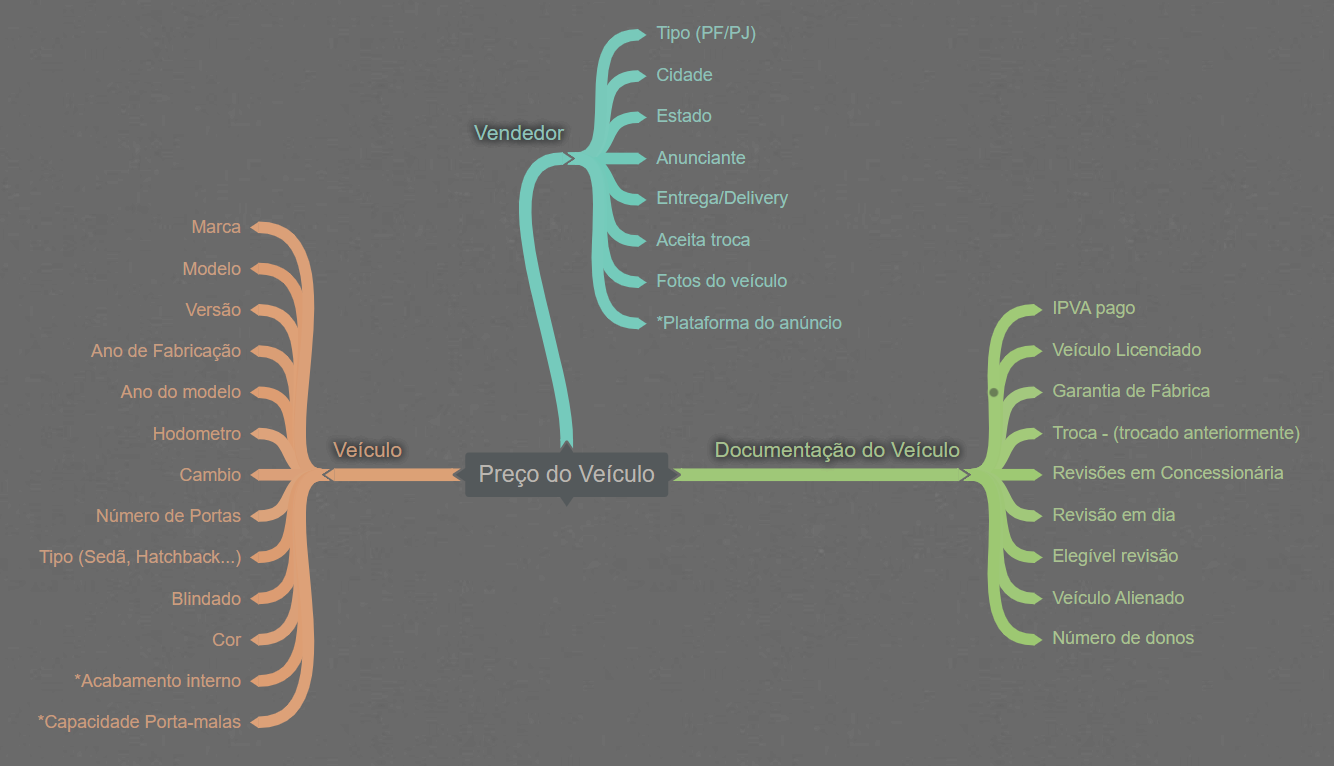

In [15]:
Image('../images/mindmap_preco_veiculo.png')

NOTA: No cotidiano de uma empresa, as etapas iniciais são compostas por:

1- Investigação individual: Nesta fase, eu, como profissional responsável pelo projeto, realizo investigações e análises preliminares, criando incialmente meu próprio mindmap.

2- Após a investigação inicial, compartilho minhas descobertas com a área de negócio, onde os stakeholders avaliam e contribuem com suas perspectivas e ideias.

3- Com base nas ideias reunidas tanto por mim quanto pela área de negócio, a equipe técnica e de análise de dados entra em ação. Juntos, verificamos quais dados estão disponíveis no banco de dados para implementar as ideias discutidas anteriormente.

Obs.: Os atributos com asterisco não estão presentes no dataset, mas é interessante investigar, pois pode contribuir para entender mais sobre o problema de negócio e talvez melhorar a performance do modelo de machine learning.

## **2.2 Hypotheses Creation**

### 2.2.1 Hipóteses do Veículo

**1.** Carros mais antigos possuem um preço menor.

**2.** Carros com maior valor de hodômetro possuem valores menores.

**3.** Carros na cor branca possuem preços maiores.

**4.** Carros com cambio manual e com valores maiores de hodometro, possuem preços menores.

### 2.2.2 Hipóteses da Documentação

**1.** Carros com garantia de fábrica possuem preços maiores.

**2.** Carros com revisões feitas em dia e nas concessionárias, possuem preços maiores.


### 2.2.3 Hipóteses do Vendedor

**1.** Carros vendidos por pessoa física possuem preços menores.

**2.** Carros da região Sudeste possuem preços maiores em média.

**3.** Vendedores que aceitam troca possuem carros com preços menores.

**4.** Carros populares de baixo padrão são mais vendidos por pessoas físicas.

## **2.3 Lista Final de Hipóteses**

**1.** Carros mais antigos possuem um preço menor.

**2.** Carros com maior valor de hodômetro possuem valores menores.

**3.** Carros na cor branca possuem preços maiores.

**4.** Carros com cambio manual e com valores maiores de hodometro, possuem preços menores.

**5.** Carros com garantia de fábrica possuem preços maiores.

**6.** Carros com revisões feitas em dia e nas concessionárias, possuem preços maiores.

**7.** Carros vendidos por pessoa física possuem preços menores.

**8.** Carros da região Sudeste possuem preços maiores em média.

**9.** Vendedores que aceitam troca possuem carros com preços menores.

**10.** Carros populares de baixo padrão são mais vendidos por pessoas físicas.

## **2.4 Feature Engineering**

In [16]:
# ano de fabricacao
df2['ano_de_fab_bin'] = df2['ano_de_fabricacao'].apply(lambda x: '<=2000' if x<=2000 else
                                                                '<=2005' if x<=2005 else
                                                                '<=2010' if x<=2010 else
                                                                '<=2015' if x<=2015 else
                                                                '<=2020' if x<=2020 else
                                                                '<=2025' if x<=2025 else 0)

print(f"{df2.isna().sum().sum()} valores NAN encontrados.")


# categoria marca
popular_baixo_padrao = ['FIAT','SUZUKI','CHEVROLET','SMART','HYUNDAI','LIFAN','SSANGYONG','RENAULT','DODGE','ALFA ROMEO','CITROËN','CHRYSLER','BRM','EFFA']
popular_alto_padrao = ['JEEP','SUBARU','FORD','KIA','CHERY','PEUGEOT','VOLKSWAGEN','NISSAN','JAC','HONDA','MITSUBISHI']
luxo = ['VOLVO','LEXUS','MERCEDES-BENZ','FERRARI','AUDI','TOYOTA','IVECO','MINI','TROLLER']
superluxo = ['PORSCHE','RAM','LAMBORGHINI','JAGUAR','LAND ROVER','MASERATI','BMW']
df2['categoria_marca'] = df2['marca'].apply(lambda x:   'popular_baixo_padrao' if x in popular_baixo_padrao else
                                                        'popular_alto_padrao' if x in popular_alto_padrao else
                                                        'luxo' if x in luxo else
                                                        'superluxo' if x in superluxo 
                                                        else 'nao_identificado')

print(f"{df2.isna().sum().sum()} valores NAN encontrados.")


# combustivel
df2['combustivel'] = df2['versao'].apply(lambda x: re.search("GASOLINA", str(x)).group() if re.search("GASOLINA", str(x)) is not None else 
                                                    re.search("FLEX", str(x)).group() if re.search("FLEX", str(x)) is not None else
                                                    re.search("HYBRID", str(x)).group() if re.search("HYBRID", str(x)) is not None else
                                                    re.search("DIESEL", str(x)).group() if re.search("DIESEL", str(x)) is not None else
                                                    re.search("ELECTRIC", str(x)).group() if re.search("ELECTRIC", str(x)) is not None else
                                                    re.search("ELÉTRICO", str(x)).group() if re.search("ELÉTRICO", str(x)) is not None else
                                                    re.search("HÍBRIDO", str(x)).group() if re.search("HÍBRIDO", str(x)) is not None else
                                                    re.search("GÁS", str(x)).group() if re.search("GÁS", str(x))  is not None else "DESCONHECIDO")
                                                    
df2['combustivel'] = df2['combustivel'].map( {'DIESEL':'DIESEL', 'FLEX':'FLEX', 'GASOLINA':'GASOLINA',
                                            'DESCONHECIDO':'NI', 'HYBRID':'HIBRIDO', 'HÍBRIDO':'HIBRIDO','ELÉTRICO':'ELÉTRICO', 'ELECTRIC': 'ELÉTRICO'})

print(f"{df2.isna().sum().sum()} valores NAN encontrados.")


# Cilindradas

cilindradas = []

for i in range(len(df2)):
    try:
        # versao = df2['versao'][i]
        cilindrada = re.search(r"[0-9]{1}\.[0-9]{1}", df2['versao'][i]).group()
        
    except:
        cilindrada = 0
    
    cilindradas.append(cilindrada)

df2_cilindradas = pd.DataFrame (cilindradas, columns = ['cilindradas'])
df2 = pd.concat([df2, df2_cilindradas], axis=1)
df2['cilindradas'] = df2['cilindradas'].astype(float)

print(f"{df2.isna().sum().sum()} valores NAN encontrados.")


# turbo

turbo_list = []

for i in range(len(df2)):
    try:
        turbo = re.search("TURBO", df2['versao'][i]).group()
    except:
        turbo = "ASPIRADO"
        
    turbo_list.append(turbo)

df2_turbo = pd.DataFrame (turbo_list, columns = ['turbo'])
df2 = pd.concat([df2, df2_turbo], axis=1)

print(f"{df2.isna().sum().sum()} valores NAN encontrados.")


# 4x4

offroad_list = []

for i in range(len(df2)):
    try:
        offroad = re.search("4X4", df2['versao'][i]).group()

    except:
        offroad = "4x2"
    
    offroad_list.append(offroad)

df2_offroad = pd.DataFrame (offroad_list, columns = ['offroad'])
df2 = pd.concat([df2, df2_offroad], axis=1)

print(f"{df2.isna().sum().sum()} valores NAN encontrados.")

# Função para as regiões do Brasil
def mapear_regiao(estado):
    estado_regiao = {
    'SP': 'Sudeste',
    'RJ': 'Sudeste',
    'MG': 'Sudeste',
    'ES': 'Sudeste',
    'PR': 'Sul',
    'RS': 'Sul',
    'SC': 'Sul',
    'BA': 'Nordeste',
    'PE': 'Nordeste',
    'CE': 'Nordeste',
    'RN': 'Nordeste',
    'PB': 'Nordeste',
    'MA': 'Nordeste',
    'PI': 'Nordeste',
    'AL': 'Nordeste',
    'SE': 'Nordeste',
    'AM': 'Norte',
    'PA': 'Norte',
    'RR': 'Norte',
    'AP': 'Norte',
    'TO': 'Norte',
    'AC': 'Norte',
    'RO': 'Norte',
    'GO': 'Centro-Oeste',
    'MT': 'Centro-Oeste',
    'MS': 'Centro-Oeste',
    'DF': 'Centro-Oeste'}

    return estado_regiao.get(estado, 'Outra Região')

# Criando uma nova coluna 'regiao'
df2['regiao'] = df2['estado_vendedor'].apply(mapear_regiao)

0 valores NAN encontrados.
0 valores NAN encontrados.
0 valores NAN encontrados.
0 valores NAN encontrados.
0 valores NAN encontrados.
0 valores NAN encontrados.


# **3.0 Filtragem de Variáveis**

In [17]:
df3 = df2.copy()

## 3.1 Filtragem das Colunas

In [18]:
# Filtragem/remoção/drop de colunas com valores constantes ou 100% nulos.
cols_drop = df3.nunique()[df3.nunique() <= 1].index.tolist() # Dropando 
df3 = df3.drop(cols_drop, axis=1)

# Removido as colunas 'veiculo_alienado' e 'elegivel_revisao', pois não fornecem informações para o modelo de machine learning, 
# já que todos os valores, em ambas as colunas possuiam um único valor.


# Remoção da coluna versão, devido a feature engineering aplicada nela
df3 = df3.drop(['versao'], axis=1)


print(f"df2: {df2.shape[1]} colunas.\ndf3: {df3.shape[1]} colunas.")
print(f"{df2.shape[1] - df3.shape[1]} colunas foram removidas.")

df2: 36 colunas.
df3: 33 colunas.
3 colunas foram removidas.


## 3.2 Exportando dataset processado

In [19]:
df3.to_csv('../datasets/cooked_datasets/df3_processed.csv', index=False)